In [13]:
!pip install ucimlrepo

In [34]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
# Step 1: Fetch the dataset
computer_hardware = fetch_ucirepo(id=29)

# Step 2: Extract features and inspect the dataset
X = computer_hardware.data.features
print("Features DataFrame:\n", X.head())

# Inspect columns to find the target variable
print("Columns in the dataset:\n", X.columns)

# Assuming 'PRP' or 'ERP' is the target variable based on common knowledge of the dataset
# PRP (published relative performance) is typically used as the target in this dataset.
target_column = 'PRP'  # Adjust if the actual target is different
y = X[target_column]

# Drop the target from the features
X = X.drop(columns=[target_column])

Features DataFrame:
   VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
Columns in the dataset:
 Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')


In [36]:
# Print metadata and variable information
print(computer_hardware.metadata)
print(computer_hardware.variables)

# Step 3: Preprocess the data
# Handle any categorical variables (if present)
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

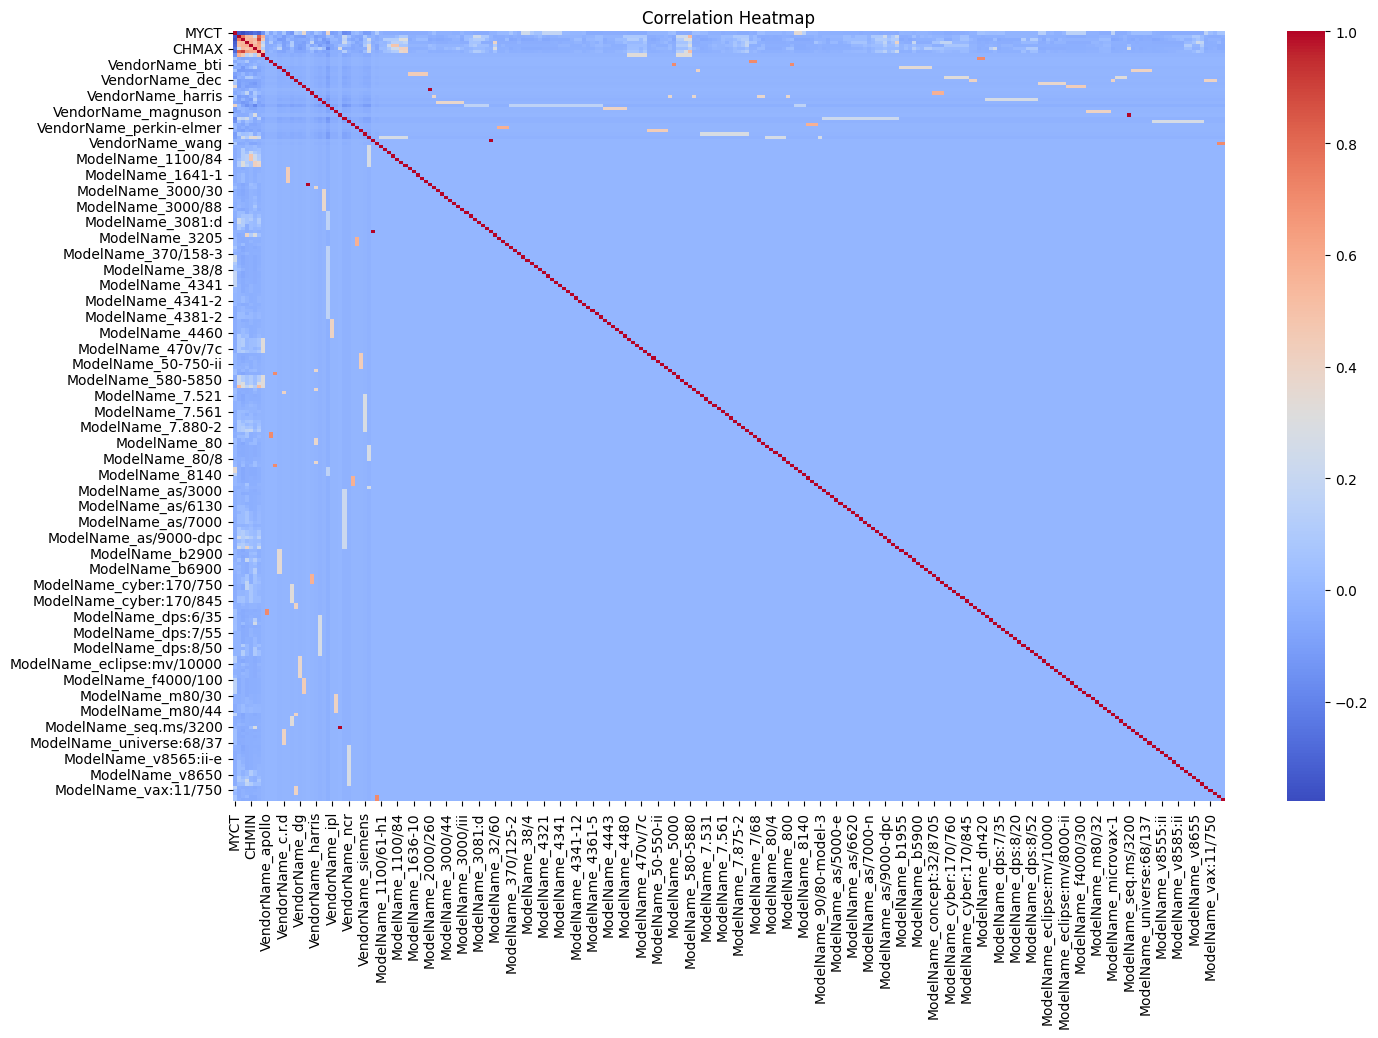

In [37]:
# Visualize correlations with a heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

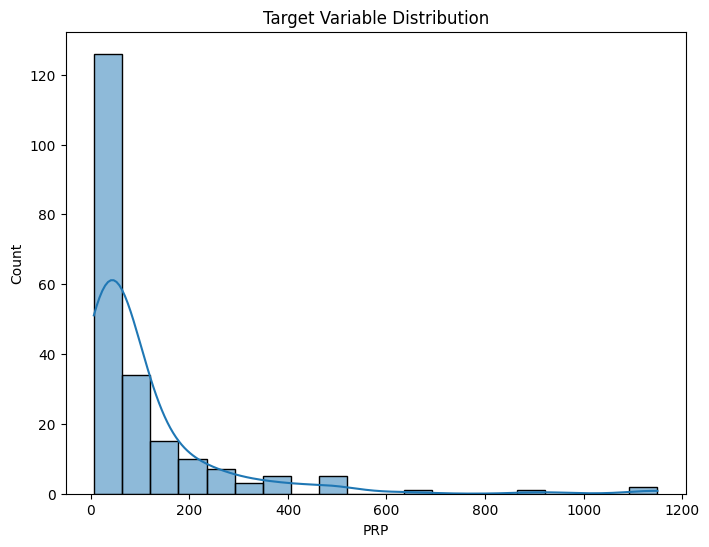

In [38]:
# Visualize distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=20)
plt.title("Target Variable Distribution")
plt.show()

In [39]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to create a model pipeline
def build_model(model):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    return pipeline

# Initialize models
models = {
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.192e+02, tolerance: 3.210e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.280e+02, tolerance: 1.499e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.148e+02, tolerance: 3.000e

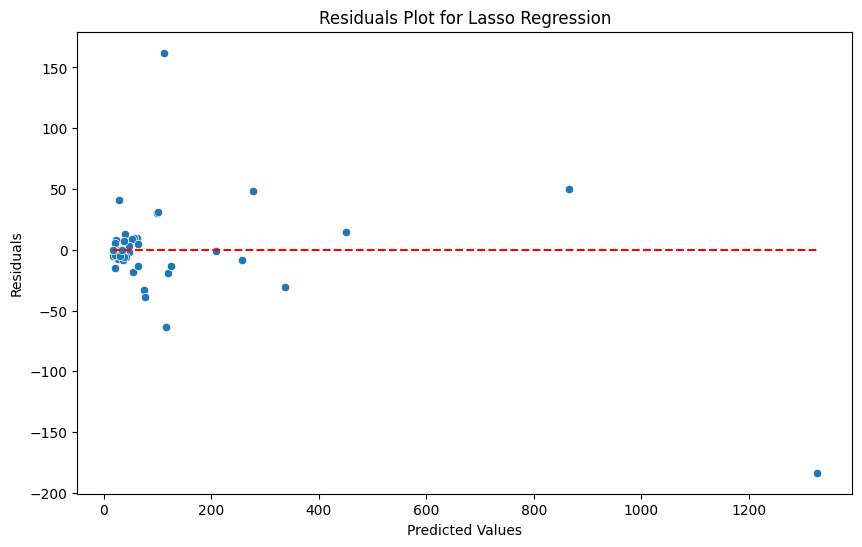

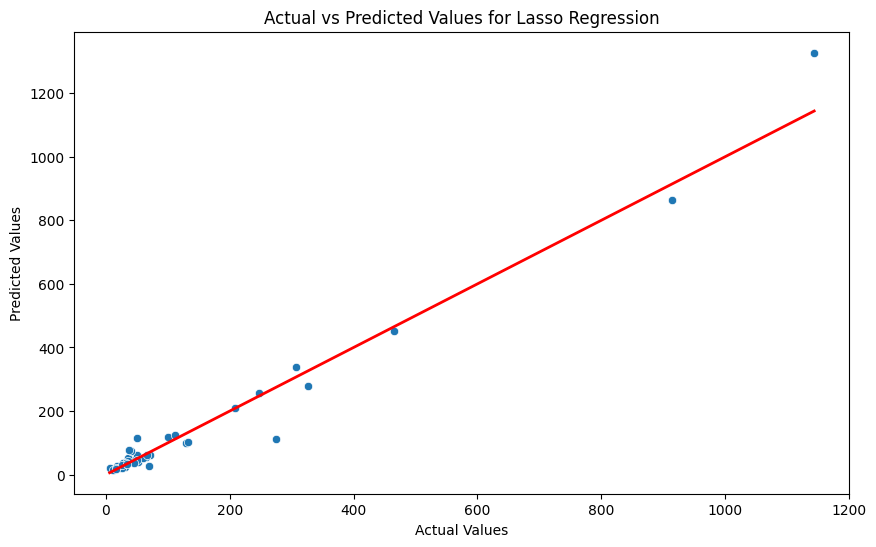

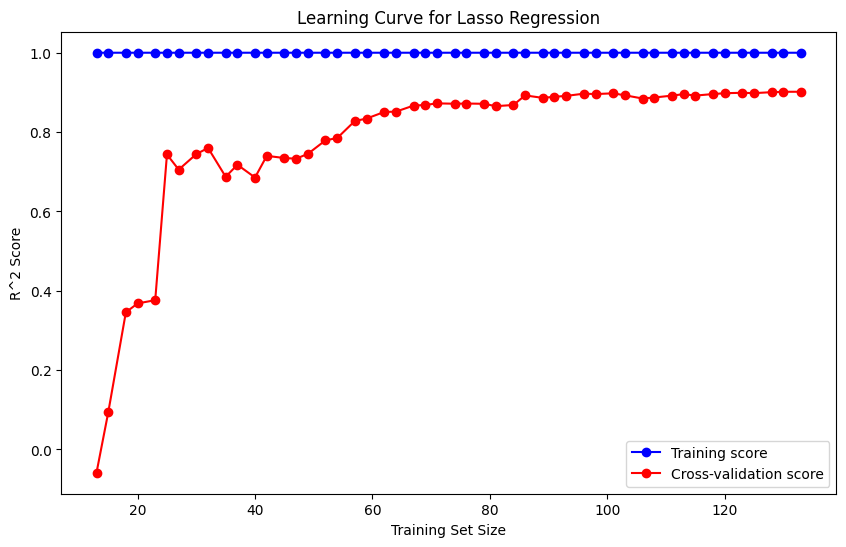

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e+03, tolerance: 3.210e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+03, tolerance: 1.499e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.957e+03, tolerance: 3.000e

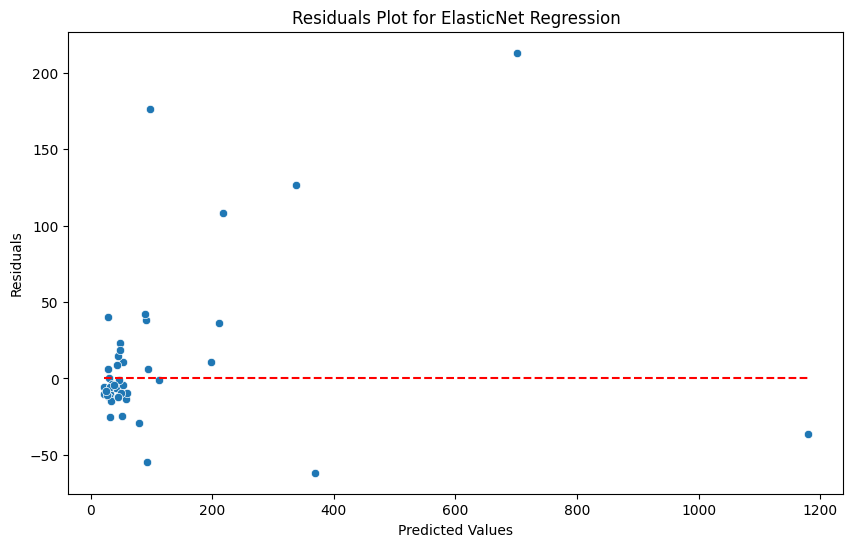

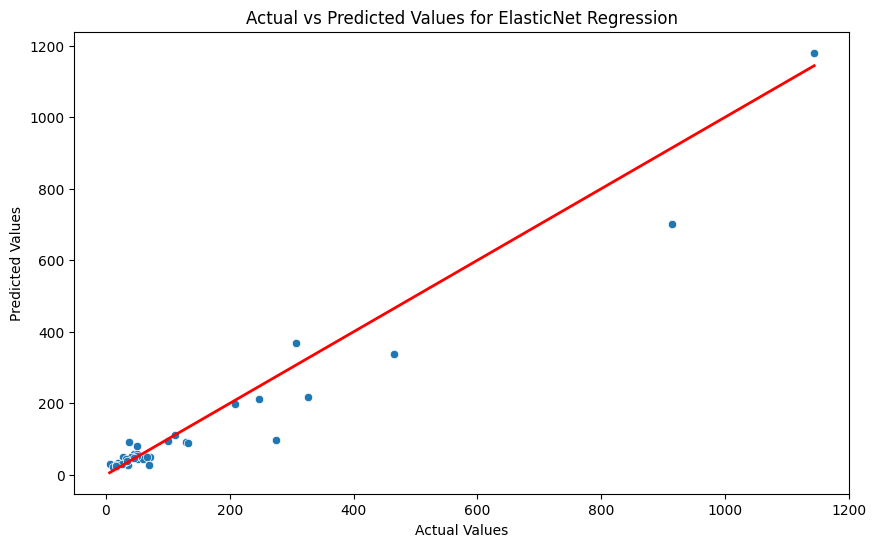

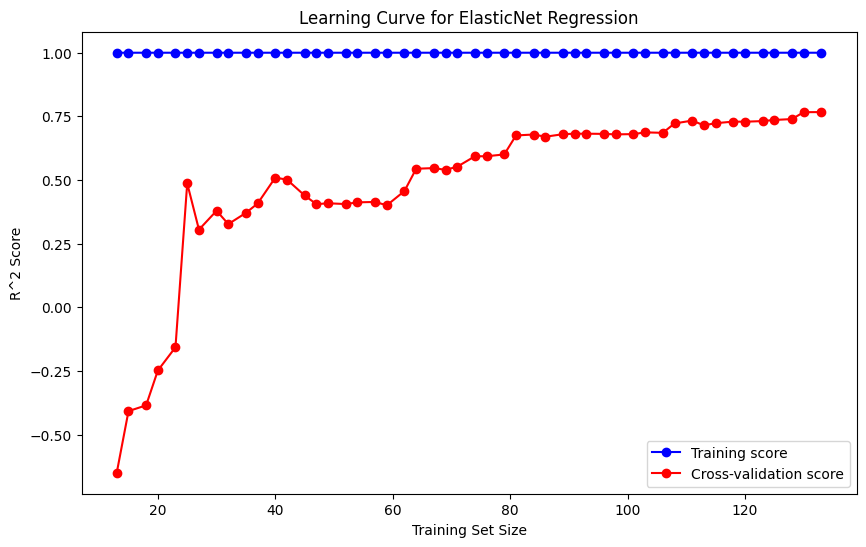

In [40]:
# Step 5: Train models and evaluate metrics
for name, model in models.items():
    # Train the model
    pipeline = build_model(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cross_val_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()

    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {name}")
    plt.show()

    # Prediction vs Actual Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values for {name}")
    plt.show()

    # Learning Curve Plot
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("R^2 Score")
    plt.legend(loc="best")
    plt.show()


In [41]:
# Print metrics
print(f"{name} Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(f"Cross-Validation R^2 Score: {cross_val_r2}")
print("-" * 40)

ElasticNet Regression Metrics:
Mean Squared Error (MSE): 2944.208278918591
Root Mean Squared Error (RMSE): 54.26055914675586
Mean Absolute Error (MAE): 30.037963393397497
R^2 Score: 0.9421647952031059
Cross-Validation R^2 Score: 0.7662775669801507
----------------------------------------
